# Exploring Clustering with Online Retail data from UCI
MSDS 7331 Data Mining Lab 3

Authors: Laura Ludwig, Anthony Schams, Josh Balson, David Stroud

## Abstract
This research proposes to find applications of clustering techniques to find groupings of retailers who purchases products from a wholesaler. Initial results show that the grouping of retailers with a distinct combination of RFM values can lead to other discoveries with bigger data sets and over different time durations. 

## Business Understanding
The concept of market segmentation is defined as the “process of subdividing a market into distinct subsets of customers that behave in the same way or have similar needs. Each subset may conceivably be choses as a market target to be reached with a distinctive marketing strategy” (Doyle 2011).

Market segmentation allows a business to analyze, understand and draw good market segments from the customers' purchasing behavior. Clustering analysis will allow us to identify segments of retail purchases who have certain characteristics. Identification of these patterns gives us an information advantage, thus allowing us to act on better solutions for our clients.

To analyze our data set in a more succinct fashion, we will use the RFM (Recency, Frequency, Monetary) analysis, which is ubiquitous in the marketing community. This strategy allows us to reduce our data set for clustering analysis, while preserving the integrity of the data that we are analyzing. 

RFM analysis has historically been used on large retail data sets of customer purchases to analyze retailer business activity. To accomplish this task, we will use clustering techniques to identify segments in the purchasing patterns to identify common characteristics. 

A good clustering will have clear boundaries separating the clusters into different populations. Based on some general market knowledge, we expect to see at 3 to 10 clusters in our data. We will use a combination of clustering scores (such as silhouette and Calinski-Harabaz scores) to determine the best clusterings using each type of clustering tried. 

## Data Understanding 1
### Data Set Description
The Online Retail Data Set from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Online+Retail) is a trans-national data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are retailers.

The selection of attributes plays an important role in good clustering analysis. Therefore, we will need to engineer appropriate RFM features in the dataset.

Once the data set has been properly cleaned, clustering intends to identify whether customers can be segmented meaningfully in the view of recency, frequency and monetary values. Several variations of clustering will be tested to find the best clusterings with each method. 

### Attribute Information:
 - InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
 - StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
 - Description: Product (item) name. Nominal.
 - Quantity: The quantities of each product (item) per transaction. Numeric.
 - InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
UnitPrice: Unit price. Numeric, Product price per unit in sterling.
 - CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
 - Country: Country name. Nominal, the name of the country where each customer res

In [1]:
import pandas as pd
import numpy as np

import time, warnings
import datetime as dt

#modules for predictive models
import sklearn.cluster as cluster
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.mixture import GMM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabaz_score

#visualizations
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings("ignore")

In [2]:
#df = pd.read_excel('OnlineRetail.xlsx')
df = pd.read_csv('OnlineRetail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


The original data includes over 540,000 order lines with 8 variables.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


There are 38 unique countries where orders have been placed from. The country with the largest order population is the United Kingdom, with 4372 unique customers. 

In [4]:
# Note that we have 38 unique countries in date set# 
df.Country.nunique()

38

In [5]:
# Breakdown of each unique country
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [6]:
# We have a total of 4,372 customer id's ~ 3,950 are from the United Kingdom
df.CustomerID.nunique()

4372

In [7]:
# List of Countries, by CustomerID in ascending order# List o 
customer_country=df[['Country','CustomerID']].drop_duplicates()
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


Since there is a significant imbalance in the representation of customers from other countries, we chose to work with only the customers from the United Kingdom.

In [8]:
# Restrict data set to the United Kingdom only# 
df = df.loc[df['Country'] == 'United Kingdom']

### Missing Data
Notice that 133,600 values are missing from CustomerID. Since the analysis is based on customers, we will remove those with missing values. Thus, we are eliminating approximately twenty-five percent of the data set.

In [9]:
# Check whether there are missing values in each column
df.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [10]:
df = df[pd.notnull(df['CustomerID'])]

We can also note that there are negative quantities in the data set. On further inspection, these negative quantities represent order cancellations. We also notice that our largest outliers in the dataset have corresponding cancellations. 

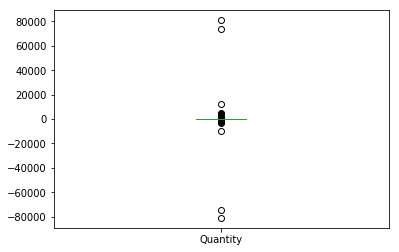

In [11]:
df.Quantity.plot(kind='box')

In [12]:
df.loc[df['Quantity'].apply(pd.to_numeric, errors='coerce').abs()>60000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/11 10:17,1.04,12346.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/11 9:15,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/11 9:27,2.08,16446.0,United Kingdom


This behavior indicates that the order was probably placed by mistake. Since we do not have a consistent way to identify which cancellations were behavioral (change of heart, for example) rather than errors, we decided to remove the cancellations AND the corresponding original orders. 

In [13]:
# Create two dataframes that represent the positive transactions and negative (cancellation) transactions separately so we can combine them# Create 
df_pos = df.loc[df['Quantity']>0]
df_neg = df.loc[df['Quantity']<0]
df_neg.loc[:, 'Quantity'] = df_neg['Quantity'] * -1

# This takes all of the transactions that are positive, and matches them with any negative transactions in a new set of columns.
df_t = df_pos.merge(df_neg, how = 'left', on=['StockCode','Quantity','CustomerID'])

In [14]:
# This takes just the rows where there is a transaction and no corresponding cancellation (as best as we can find)
df_t1 = df_t.loc[df_t['InvoiceNo_y'].isnull()]
df_t2 = df_t1.iloc[:,0:8]
df_t2.columns = df.columns
df_t2.describe()

,Quantity,UnitPrice,CustomerID
count,349809.000000,349809.000000,349809.000000
mean,11.455074,2.879932,15550.102433
std,45.575768,8.295879,1594.121433
min,1.000000,0.000000,12747.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.850000,15524.000000
75%,12.000000,3.750000,16931.000000
max,12540.000000,2033.100000,18287.000000


In [15]:
# There are no more negative quantities, and we have the resulting shape. 
df = df_t2
df.shape

(349809, 8)

The remaining dataset, having removed the orders that were cancelled and the cancelations, have 349,809 order line entries with eight different variables.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349809 entries, 0 to 354722
Data columns (total 8 columns):
InvoiceNo      349809 non-null object
StockCode      349809 non-null object
Description    349809 non-null object
Quantity       349809 non-null int64
InvoiceDate    349809 non-null object
UnitPrice      349809 non-null float64
CustomerID     349809 non-null float64
Country        349809 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 24.0+ MB


In [17]:
# Check the unique values for each column
def unique_counts(df):
    for i in df.columns:
        count = df[i].nunique()
        print(i, ":", count)
unique_counts(df)

InvoiceNo : 16424
StockCode : 3639
Description : 3835
Quantity : 282
InvoiceDate : 15412
UnitPrice : 387
CustomerID : 3910
Country : 1


Because each instance of our dataset represents a line item on an order form, we want to get an order line total as a feature of our dataset. This can then later be aggregated to get the monetary value for the customer.

In [18]:
# add a column for total price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [19]:
# We now have a clean data set and are ready to 
# proceed with placing the data in RPM format
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349809 entries, 0 to 354722
Data columns (total 9 columns):
InvoiceNo      349809 non-null object
StockCode      349809 non-null object
Description    349809 non-null object
Quantity       349809 non-null int64
InvoiceDate    349809 non-null object
UnitPrice      349809 non-null float64
CustomerID     349809 non-null float64
Country        349809 non-null object
TotalPrice     349809 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 26.7+ MB


### Feature Engineering
The purpose of using the RFM analysis is to reduce the data set into attributes that may explain the business activities of the retailers. When you use domain knowledge to choose which data metrics to use as input features into a machine learning algorithm, you are using feature engineering. Feature engineering plays a key role in k-means clustering by capturing the variability of the data that is essential for the algorithm to find all of the natural-occurring groups. 

For RFM, there are three main features that we need to construct:

 - RECENCY (R): the Recency value is the time interval between a pre-defined point in time and the customers most recent transaction.  Our code uses December 10, 2001 as the date to calculate regency, as this is the day after the last transaction of the data set. 
 - FREQUENCY (F): ~ the total number of transactions from the retailers. Our data set takes cancellations into consideration and we have adjusted accordingly.
 - MONETARY VALUE (M): the total dollar amount of transactions from the retailer.
 
In addition to the standard RFM measures, we included an Average Order Size variable. This can be used to compare customers on a combination of the frequency and monetary value variables.

#### Structure data set according to RFM analysis

In [20]:
# Find the first and last order dates in the data# Find t 
# to satisfy the Frequency requirements
df['InvoiceDate'].min() # min date

'1/10/11 10:32'

In [21]:
df['InvoiceDate'].max() # max date

'9/9/11 9:52'

In [22]:
# In order to create the frequency table, a point in time
# must be calculated. Since the last invoice date is 2011-12-09
# we will use 2011-12-10 to calculate Recency
import datetime as dt
NOW = dt.datetime(2011,12,10)

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [23]:
# Create RFM table
rfmTable = df.groupby('CustomerID').agg({'InvoiceDate': lambda x:
                                        (NOW - x.max()).days,
                                        'InvoiceNo': lambda x: x.nunique(),
                                        'TotalPrice': lambda x: x.sum()})
rfmTable['AverageOrderSize']= rfmTable['TotalPrice']/rfmTable['InvoiceNo']

rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.rename(columns={'InvoiceDate': 'recency',
                        'InvoiceNo': 'frequency',
                        'TotalPrice': 'monetary_value',
                        'AverageOrderSize': 'average_order'},
               inplace=True)

In [24]:
rfmTable.head()

,recency,frequency,monetary_value,average_order
CustomerID,,,,
12747.0,2,11,4196.01,381.455455
12748.0,0,202,30559.46,151.284455
12749.0,3,5,4090.88,818.176000
12820.0,3,4,942.34,235.585000
12821.0,214,1,92.72,92.720000


#### Understanding the RFM Variables:
Examples: 
- Customer 12747.0 has a Frequency of 11, Monetary value of $4,196.01 and Recency of 2 days. This customer has made several purchases and their last purchase was two days before the end of the period of interest. 

- Customer 12821.0 has a Frequency of 1 , Monetary value of $92.72 and Recency of 214 days. The customer has made only one transaction, and it was 214 days ago.

From a business prespective, we expect that the orders follow the Pareto rule (80% of revenue is generated by 20% of customers). We want to validate this assumption. 

In [25]:
# get the 80% of the monetary value
pareto_cutoff = rfmTable['monetary_value'].sum() * 0.8
print("The 80% of total revenue is: ",round(pareto_cutoff,2))

The 80% of total revenue is:  5430510.04


### Create a customers rank table that ranks customers by how much they purchased¶

To get an initial feel for what customers rank the highest in terms of monetary value, we create a customer rank table.

In [26]:
customers_rank  = rfmTable
# Create a new column that is the rank of the value of coverage in ascending order
customers_rank['Rank'] = customers_rank['monetary_value'].rank(ascending=0)
#customers_rank.drop('RevenueRank',axis=1,inplace=True)
customers_rank.head()

,recency,frequency,monetary_value,average_order,Rank
CustomerID,,,,,
12747.0,2,11,4196.01,381.455455,272.0
12748.0,0,202,30559.46,151.284455,22.0
12749.0,3,5,4090.88,818.176000,285.0
12820.0,3,4,942.34,235.585000,1489.0
12821.0,214,1,92.72,92.720000,3781.0


### Top Customers

In [27]:
customers_rank.sort_values('Rank',ascending=True)

,recency,frequency,monetary_value,average_order,Rank
CustomerID,,,,,
18102.0,0,60,259657.30,4327.621667,1.0
17450.0,8,45,189767.53,4217.056222,2.0
17511.0,2,30,77682.38,2589.412667,3.0
16684.0,4,27,65767.48,2435.832593,4.0
14096.0,4,17,65164.79,3833.222941,5.0
13694.0,3,48,61403.14,1279.232083,6.0
15311.0,0,90,58949.31,654.992333,7.0
13089.0,2,93,57573.28,619.067527,8.0
15061.0,3,48,54391.94,1133.165417,9.0


In order to finish the Pareto analysis, we need to get the revenue generated by the top 20% of customers.

In [28]:
# get the top 20% of customers
top_20percent = 3910 * 20 / 100
top_20percent

782.0

In [29]:
# sum the monetary values over the customer with rank <=782

In [30]:
top_20percent_revenue = customers_rank[customers_rank['Rank'] <= 782]['monetary_value'].sum()
top_20percent_revenue

4873025.921

Pareto principle is somewhat applicable to this data set

 - The 80% of total revenue is 5430510.04 
 - Top 20% of 4873025.92

### RFM Quartiles
We will create customer segments from the RFM model and assign a score from 1 to 4. This is common practice in industry. 

In [31]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary_value,average_order,Rank
0.25,17.0,1.0,296.2625,172.908125,978.25
0.50,50.0,2.0,639.4550,278.971111,1955.50
0.75,143.0,5.0,1538.1225,407.323125,2932.75


In [32]:
# Convert the dataframe to a dictionary for 
# building the RFM segmentation table
quantiles.to_dict()

{'recency': {0.25: 17.0, 0.5: 50.0, 0.75: 143.0},
 'frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'monetary_value': {0.25: 296.2625, 0.5: 639.455, 0.75: 1538.1224999999997},
 'average_order': {0.25: 172.908125,
  0.5: 278.9711111111111,
  0.75: 407.32312500000006},
 'Rank': {0.25: 978.25, 0.5: 1955.5, 0.75: 2932.75}}

### Create RFM segmentation table
Two segmentation classes are created.

In [33]:
# x = value, p = recency, monetary_value, frequency, d = quartiles dict
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [34]:
# x = value, p = recency, monetary_value, frequency, d = quartiles dict
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [35]:
# create RFM segmentation table
rfm_segmentation = rfmTable
rfm_segmentation['R_Quartile'] = rfm_segmentation['recency'].apply(RScore, args=('recency', quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['frequency'].apply(FMScore, args=('frequency', quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['monetary_value'].apply(FMScore, args=('monetary_value', quantiles,))

In [36]:
# From our code above, we have transformed the recency, frequency and montetary_value
# into four distinct quartiles 1 to 4 respectively representing 0 to 100%
rfm_segmentation.head()

,recency,frequency,monetary_value,average_order,Rank,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,,,
12747.0,2,11,4196.01,381.455455,272.0,4,1,1
12748.0,0,202,30559.46,151.284455,22.0,4,1,1
12749.0,3,5,4090.88,818.176000,285.0,4,2,1
12820.0,3,4,942.34,235.585000,1489.0,4,2,2
12821.0,214,1,92.72,92.720000,3781.0,1,4,4


In [37]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,recency,frequency,monetary_value,average_order,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,,
12747.0,2,11,4196.01,381.455455,272.0,4,1,1,411
12748.0,0,202,30559.46,151.284455,22.0,4,1,1,411
12749.0,3,5,4090.88,818.176000,285.0,4,2,1,421
12820.0,3,4,942.34,235.585000,1489.0,4,2,2,422
12821.0,214,1,92.72,92.720000,3781.0,1,4,4,144


In [38]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('monetary_value', ascending=False).head(10)

,recency,frequency,monetary_value,average_order,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,,
17247.0,15,1,282.19,282.19,2981.0,4,4,4,444
14480.0,11,1,279.05,279.05,2993.0,4,4,4,444
17767.0,15,1,271.20,271.20,3013.0,4,4,4,444
17385.0,14,1,261.11,261.11,3046.0,4,4,4,444
16024.0,12,1,251.24,251.24,3082.0,4,4,4,444
15097.0,4,1,248.08,248.08,3097.0,4,4,4,444
13349.0,10,1,247.32,247.32,3100.0,4,4,4,444
15783.0,10,1,246.30,246.30,3103.0,4,4,4,444
16528.0,3,1,244.41,244.41,3110.0,4,4,4,444


We can classify customers on their RFM segmentations. These are customer types we expect to see, and would be targetable market segments. 

In [39]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  55
Loyal Customers:  1353
Big Spenders:  978
Almost Lost:  184
Lost Customers:  400
Lost Cheap Customers:  12


## Data Understanding 2: Visualization
The box plots below show a distribution of the new variables. There are large, expected differences in the scale of the variables, and most are largely skewed. 

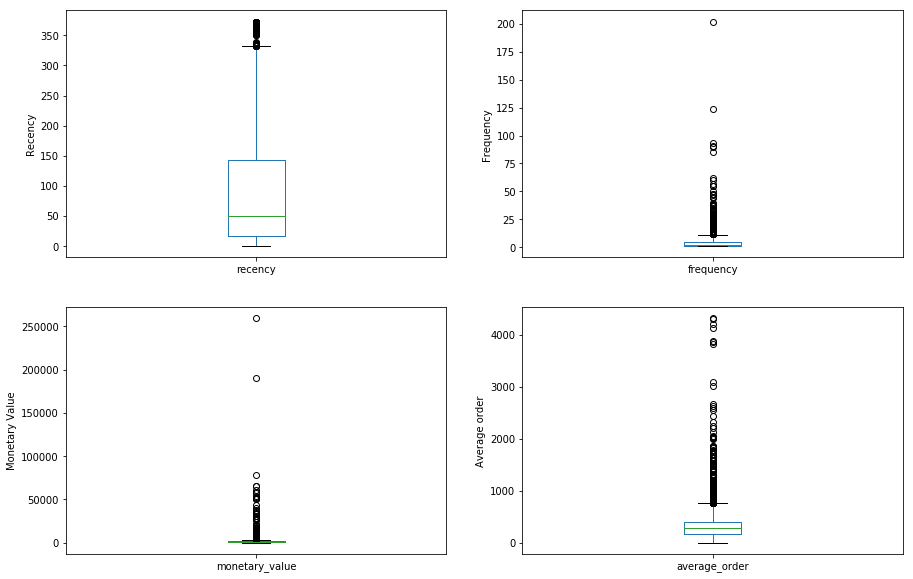

In [40]:
# Look at box plots of variables
plt.figure(figsize = (15,10))
plt.subplot(221)
rfmTable.recency.plot(kind='box')
plt.ylabel('Recency')
plt.subplot(222)
rfmTable.frequency.plot(kind='box')
plt.ylabel('Frequency')
plt.subplot(223)
rfmTable.monetary_value.plot(kind='box')
plt.ylabel('Monetary Value')
plt.subplot(224)
rfmTable.average_order.plot(kind='box')
plt.ylabel('Average order')


plt.show()

Because we know that our data is skewed, we take the log transformation of the data in order to experiment with that as well as other normalized formats for our features. 

In [41]:
rfm_data = rfmTable
rfm_data.describe()

,recency,frequency,monetary_value,average_order,Rank,R_Quartile,F_Quartile,M_Quartile
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,92.046547,4.200512,1736.096561,343.800542,1955.500000,2.508696,2.684399,2.500000
std,99.803816,7.064531,6601.251333,317.679319,1128.864101,1.123621,1.142960,1.118406
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,17.000000,1.000000,296.262500,172.908125,978.250000,2.000000,2.000000,1.250000
50%,50.000000,2.000000,639.455000,278.971111,1955.500000,3.000000,3.000000,2.500000
75%,143.000000,5.000000,1538.122500,407.323125,2932.750000,4.000000,4.000000,3.750000
max,373.000000,202.000000,259657.300000,4327.621667,3910.000000,4.000000,4.000000,4.000000


In [42]:
#log transformation
rfm_r_log = np.log(rfm_data['recency']+1) #can't take log(0) and so add 1 to avoid negative values
rfm_f_log = np.log(rfm_data['frequency'])
rfm_m_log = np.log(rfm_data['monetary_value']+1)
rfm_a_log = np.log(rfm_data['average_order']+1)

In [43]:
log_data = pd.DataFrame({'Monetary': rfm_m_log,'Recency': rfm_r_log,'Frequency': rfm_f_log,'AverageOrder': rfm_a_log})

In [44]:
log_data.describe()

,AverageOrder,Frequency,Monetary,Recency
count,3910.000000,3910.000000,3910.000000,3910.000000
mean,5.590189,0.938794,6.526994,3.801249
std,0.709402,0.896210,1.236157,1.383083
min,0.000000,0.000000,0.000000,0.000000
25%,5.158527,0.000000,5.694616,2.890372
50%,5.634686,0.693147,6.462179,3.931826
75%,6.012059,1.609438,7.338968,4.969813
max,8.373004,5.308268,12.467122,5.924256


The log transformed data is more spread, and we can see relationships in the below pair plot. The distribution of the Frequency is still non-normal, and Recency is following some other distribution as well. 

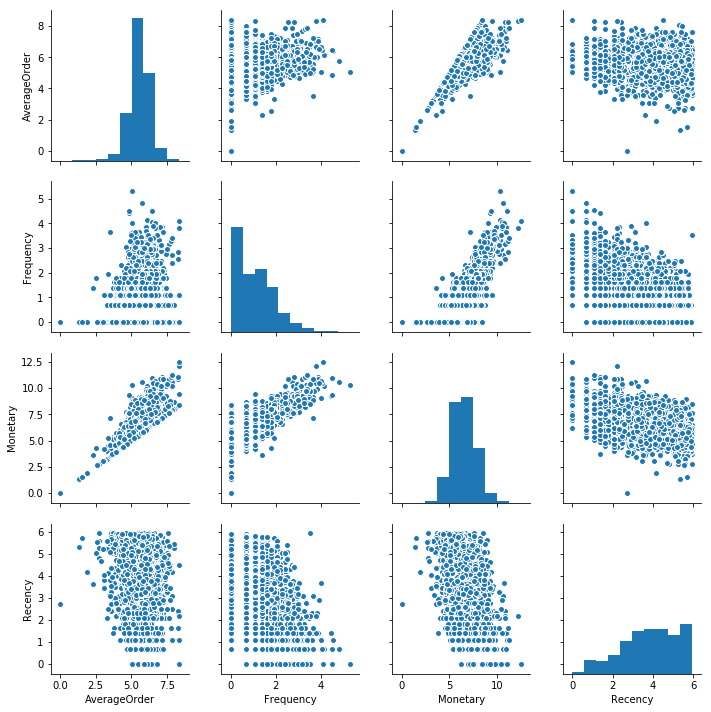

In [45]:
import seaborn as sns

sns.pairplot(log_data)

We also see an expected correlation between the Average Order and the Frequency and Monetary variables, since the Average Order is engineered to using those two variables. 

In [46]:
corr = log_data.corr()
corr.style.background_gradient()

,AverageOrder,Frequency,Monetary,Recency
AverageOrder,1,0.174811,0.701491,-0.140014
Frequency,0.174811,1,0.824331,-0.576748
Monetary,0.701491,0.824331,1,-0.498009
Recency,-0.140014,-0.576748,-0.498009,1


## Modeling and Evaluation
### Clustering 1: DBSCAN
#### Train and Adjust Parameters

In [47]:
as_data= log_data[['Frequency','Recency','Monetary']].values
as_rfm = rfm_data[['frequency', 'recency', 'monetary_value']].values

anthony_data = np.vstack((as_data[:,0],
               as_rfm[:, 1],
               as_data[:,2])).T
ss = StandardScaler()
anthony_data = ss.fit_transform(anthony_data)
anthony_data2 = ss.inverse_transform(anthony_data)

DBSCAN begins with an arbitrary starting data point that has not been visited. If there are a sufficient number of points with this neighborhood, then the clustering process starts and the current data points becomes the first point of the new cluster. Otherwise, the point will be labelled as noise. 

One of the major advantages of DBSCAN is that is does not require a pre-set number of clusters. Another advantage is that it identifies outliers as noise. Points in low-density regions are classified as noise and omitted.

The main drawback of DBSCAN is that it doesn’t perform as well as others when the clusters are of varying density. 

For minpts = 8 eps = 0.5 ; Silhouette_score: 0.3477 Calinski-Harabaz Score: 1226.0
For minpts = 8 eps = 0.55 ; Silhouette_score: 0.3535 Calinski-Harabaz Score: 1231.0
For minpts = 8 eps = 0.6 ; Silhouette_score: 0.3514 Calinski-Harabaz Score: 1240.0
For minpts = 8 eps = 0.65 ; Silhouette_score: 0.3563 Calinski-Harabaz Score: 1233.0
For minpts = 8 eps = 0.7 ; Silhouette_score: 0.3557 Calinski-Harabaz Score: 1246.0
For minpts = 8 eps = 0.75 ; Silhouette_score: 0.3566 Calinski-Harabaz Score: 1245.0
For minpts = 9 eps = 0.5 ; Silhouette_score: 0.3473 Calinski-Harabaz Score: 1225.0
For minpts = 9 eps = 0.55 ; Silhouette_score: 0.352 Calinski-Harabaz Score: 1229.0
For minpts = 9 eps = 0.6 ; Silhouette_score: 0.353 Calinski-Harabaz Score: 1224.0
For minpts = 9 eps = 0.65 ; Silhouette_score: 0.3563 Calinski-Harabaz Score: 1233.0
For minpts = 9 eps = 0.7 ; Silhouette_score: 0.3557 Calinski-Harabaz Score: 1246.0
For minpts = 9 eps = 0.75 ; Silhouette_score: 0.3557 Calinski-Harabaz Score: 1246.0


Text(0.5,1,'Silhouette Score ')

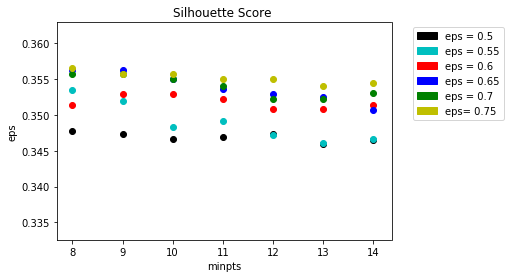

In [48]:
c = ['k','c','r','b','g','y']
for minpts in range(8,15):
    for eps in range(10,16):
        true_eps = eps/20
        clustering = DBSCAN(eps=true_eps, min_samples=minpts)
        clustering.fit(anthony_data)
        clusters = clustering.labels_
        silhouette_avg = silhouette_score(anthony_data, clusters)
        print("For minpts =", minpts,
              'eps =',true_eps,
              "; Silhouette_score:", np.round(silhouette_avg,4),
              'Calinski-Harabaz Score:', np.round(calinski_harabaz_score(anthony_data, clusters)))
        plt.scatter(minpts,silhouette_avg, c=c[eps-10])

red_patch = mpatches.Patch(color='red', 
                           label='eps = 0.6')
cyan_patch = mpatches.Patch(color = 'c', label = 'eps = 0.55')
blue_patch = mpatches.Patch(color='blue',
                            label = 'eps = 0.65')
black_patch = mpatches.Patch(color='black', 
                             label = 'eps = 0.5')
green_patch = mpatches.Patch(color='g',
                            label = 'eps = 0.7')
yellow_patch = mpatches.Patch(color = 'y', 
                             label = 'eps= 0.75')
plt.legend(handles=[black_patch, cyan_patch, red_patch, blue_patch, green_patch, yellow_patch],
           bbox_to_anchor=(1.05, 1),
           loc=2)

plt.xlabel('minpts')
plt.ylabel('eps')
plt.title('Silhouette Score ')

#### Evaluate and Compare

The best clustering, according to silhouette score, is for eps = 0.65 and minpts = 9. This gave a silhouette score of 0.3563. The best clustering according to Calinski-Harabaz score was for eps = 0.7 and minpts = 12. It's however important to note that neither score varied much across the various eps-minpts values tested.

#### Visualize Results

Text(0,0.5,'log(Monetary Value)')

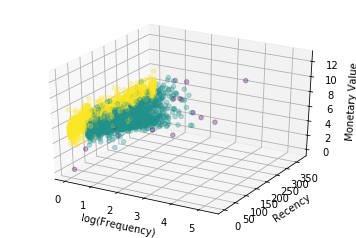

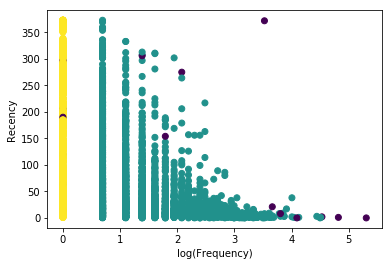

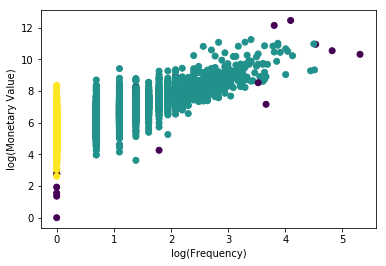

In [49]:
from mpl_toolkits.mplot3d import Axes3D


clustering = DBSCAN(eps=0.65, min_samples=9)
clustering.fit(anthony_data)
clusters = clustering.labels_

fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
p = ax.scatter(anthony_data2[:,0],
               anthony_data2[:, 1],
               anthony_data2[:,2],
              alpha = 0.3,
              c=clusters)

ax.set_xlabel('log(Frequency)')
ax.set_ylabel('Recency')
ax.set_zlabel('Monetary Value')

plt.figure()
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
plt.scatter(anthony_data2[:,0],
            anthony_data2[:, 1],
            c = clusters)
plt.ylabel('Recency')
plt.xlabel('log(Frequency)')

plt.figure()
plt.scatter(anthony_data2[:,0],
            anthony_data2[:, 2],
            c = clusters)
plt.xlabel('log(Frequency)')
plt.ylabel('log(Monetary Value)')

#### Summarize Ramifications
DBScan seems to create 3 clusters based heavily on frequency of purchase. One cluster consists of buyers that made once purchase, and the second consists of buyers that made more than 1 purchase. The third cluster seems to only have a few points in it, and they do not appear strongly correlated with one another. It is important to note that it contains buyers that both made 1 purchase and others that made more than 1. As can be seen in the 3-D plot however, all of these points lay distinctly outside of the other clusters. These are our noise points.

### Clustering 2: Agglomerative Clustering
#### Train and Adjust Parameters
Start with the points as individual clusters and, at each step, merge the closest pair of clusters. This requires defining a notion of cluster proximity. 

The space and time complexity of hierarchical clustering severely limits the size of data sets that can be processed. This, of course, is a major drawback.

Considering the small number of clusters found by DBSCAN, and the overall structure of the data, there is likely a small number of significant clusters. We will therefore be testing for n_clusters between 2 and 9, and looking at 3 linkage measurements: Ward, Complete, and Average.


In [59]:
for n_clust in range(2,10):
    for link in ['ward', 'complete', 'average']:
        clustering2 = AgglomerativeClustering(n_clusters =n_clust, 
                                        linkage = link)
        clustering2.fit(anthony_data)
        clusters2 = clustering2.labels_
        print('n_clusters =', n_clust,
              '; linkage =', link, 
              '; Silhouette score =',np.round(silhouette_score(anthony_data, clusters2),4),
              '; Calinski-Harabaz score = ', np.round(calinski_harabaz_score(anthony_data, clusters2)))


n_clusters = 2 ; linkage = ward ; Silhouette score = 0.3843 ; Calinski-Harabaz score =  3063.0
n_clusters = 2 ; linkage = complete ; Silhouette score = 0.3646 ; Calinski-Harabaz score =  1941.0
n_clusters = 2 ; linkage = average ; Silhouette score = 0.6076 ; Calinski-Harabaz score =  10.0
n_clusters = 3 ; linkage = ward ; Silhouette score = 0.3895 ; Calinski-Harabaz score =  3824.0
n_clusters = 3 ; linkage = complete ; Silhouette score = 0.2278 ; Calinski-Harabaz score =  1875.0
n_clusters = 3 ; linkage = average ; Silhouette score = 0.4943 ; Calinski-Harabaz score =  8.0
n_clusters = 4 ; linkage = ward ; Silhouette score = 0.3126 ; Calinski-Harabaz score =  3411.0
n_clusters = 4 ; linkage = complete ; Silhouette score = 0.1994 ; Calinski-Harabaz score =  1335.0
n_clusters = 4 ; linkage = average ; Silhouette score = 0.3539 ; Calinski-Harabaz score =  402.0
n_clusters = 5 ; linkage = ward ; Silhouette score = 0.3111 ; Calinski-Harabaz score =  3219.0
n_clusters = 5 ; linkage = complete

#### Evaluate and Compare
Agglomerative clustering yields a slightly different result from DBSCAN. The best clustering, according to silhouette score, is for n_clusters = 2 and average linkage. It has a much higher silhouette score than all other models. n_clusters = 3 with average linkage also has a silhouette score much higher than other combinations. We will therefore look at these two. They however have abysmally low Calinski-Harabaz scores.
The 2 highest Calinski-Harabaz scores are for n_clusters = 3 and n_clusters = 4 with Ward linkage. Ward clustering in general gives higher Calinski-Harabaz scores than the other linkage types. 
Let's look at all 4 of these clusterings more carefully.

#### Visualize Results

Text(0,0.5,'log(Monetary Value)')

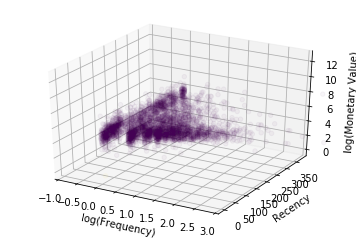

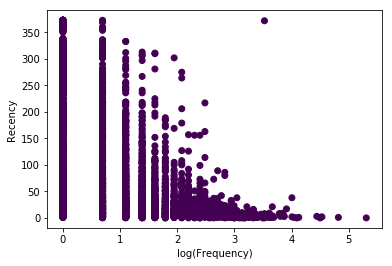

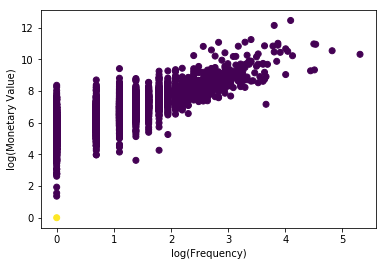

In [51]:
clustering2 = AgglomerativeClustering(n_clusters =2, 
                                linkage = 'average')
clustering2.fit(anthony_data)
clusters2 = clustering2.labels_
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
p = ax.scatter(anthony_data2[:,0],
               anthony_data2[:, 1],
               anthony_data2[:,2],
              alpha = 0.04,
              c=clusters2)

ax.set_xlim3d(-1,3)
ax.set_xlabel('log(Frequency)')
ax.set_ylabel('Recency')
ax.set_zlabel('log(Monetary Value)')

plt.figure()
plt.scatter(anthony_data2[:,0],
            anthony_data2[:, 1],
            c = clusters2)
plt.ylabel('Recency')
plt.xlabel('log(Frequency)')

plt.figure()
plt.scatter(anthony_data2[:,0],
            anthony_data2[:, 2],
            c = clusters2)
plt.xlabel('log(Frequency)')
plt.ylabel('log(Monetary Value)')

#### Summarize Ramifications
We can see that agglomerative clustering with 2 clusters does not offer any real insight into the data. All it revealis is that one buyer made a single very small purchase, and that made them different enough to belong in a cluster alone. No real insight is offered.

#### Visualize Results

Text(0,0.5,'log(Monetary Value)')

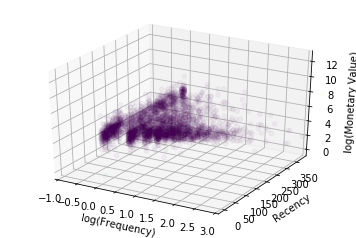

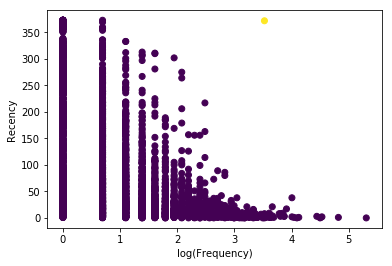

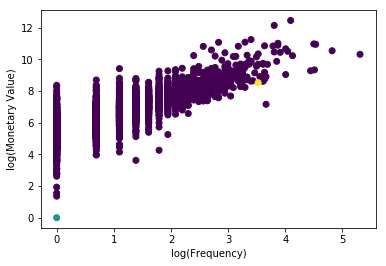

In [52]:
clustering3 = AgglomerativeClustering(n_clusters =3, 
                                linkage = 'average')
clustering3.fit(anthony_data)
clusters3 = clustering3.labels_
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
p = ax.scatter(anthony_data2[:,0],
               anthony_data2[:, 1],
               anthony_data2[:,2],
              alpha = 0.04,
              c=clusters3)
ax.set_xlim3d(-1,3)
ax.set_xlabel('log(Frequency)')
ax.set_ylabel('Recency')
ax.set_zlabel('log(Monetary Value)')

plt.figure()
plt.scatter(anthony_data2[:,0],
            anthony_data2[:, 1],
            c = clusters3)
plt.ylabel('Recency')
plt.xlabel('log(Frequency)')

plt.figure()
plt.scatter(anthony_data2[:,0],
            anthony_data2[:, 2],
            c = clusters3)

plt.xlabel('log(Frequency)')
plt.ylabel('log(Monetary Value)')

#### Summarize Ramifications
These clustering parameters yield 3 clusters. 2 of them contain 1 point each, and the third is the rest of the data. These clusters are not very meaningful except to identify these 2 outliers.
Again, this is not a helpful clustering result. It appears that silhouette score alone is not a good metric for this dataset. Both of the clusterings examined so far have had very low Calinski-Harabaz scores. Perhaps this metric will help identify better clusterings.

#### Visualize Results

Text(0,0.5,'log(Monetary Value)')

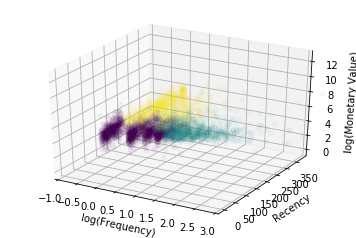

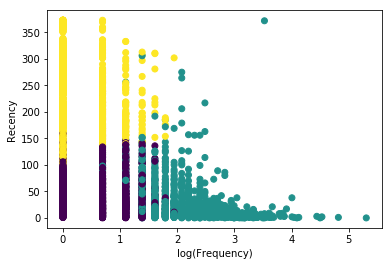

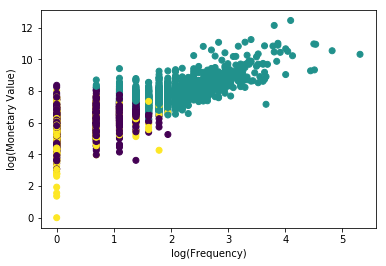

In [53]:
clustering4 = AgglomerativeClustering(n_clusters =3, 
                                linkage = 'ward')
clustering4.fit(anthony_data)
clusters4 = clustering4.labels_
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
p = ax.scatter(anthony_data2[:,0],
               anthony_data2[:, 1],
               anthony_data2[:,2],
              alpha = 0.04,
              c=clusters4)
ax.set_xlabel('log(Frequency)')
ax.set_ylabel('Recency')
ax.set_zlabel('log(Monetary Value)')
ax.set_xlim3d(-1,3)


plt.figure()
plt.scatter(anthony_data2[:,0],
            anthony_data2[:, 1],
            c = clusters4)
plt.ylabel('Recency')
plt.xlabel('log(Frequency)')

plt.figure()
plt.scatter(anthony_data2[:,0],
            anthony_data2[:, 2],
            c = clusters4)
plt.xlabel('log(Frequency)')
plt.ylabel('log(Monetary Value)')

#### Summarize Ramifications
This looks like a real clustering result! 
- The first cluster (yellow) is characterized by less frequent, less recent buyers. They also typically buy less than the average buyer.
- The second cluster (purple) is less frequent spenders that recently purchased goods. They typically spend around the average amount of money.
- The third cluster (green) is buyers that have recently bought. They typically buy less frequently, but they spend more money that the average customer.


It appears that the Calinski-Harabaz score may be better at identifying practically significant clusters. Let's look at the second best Calinski-Harabaz score, n_clusters = 4 with Ward linkage.

#### Visualize Results

Text(0,0.5,'log(Monetary Value)')

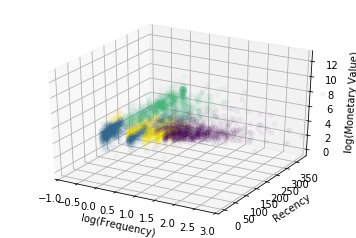

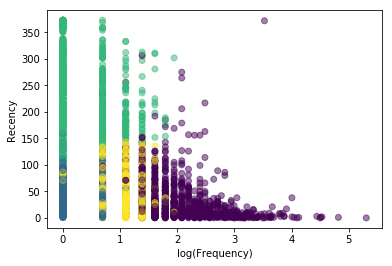

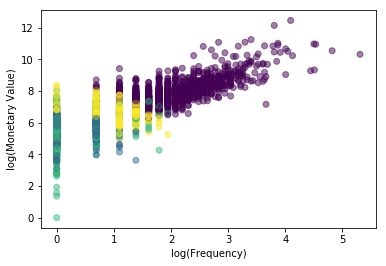

In [54]:
clustering5 = AgglomerativeClustering(n_clusters =4, 
                                linkage = 'ward')
clustering5.fit(anthony_data)
clusters5 = clustering5.labels_
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
p = ax.scatter(anthony_data2[:,0],
               anthony_data2[:, 1],
               anthony_data2[:,2],
              alpha = 0.04,
              c=clusters5)
ax.set_xlim3d(-1,3)
ax.set_xlabel('log(Frequency)')
ax.set_ylabel('Recency')
ax.set_zlabel('log(Monetary Value)')

plt.figure()
plt.scatter(anthony_data2[:,0],
            anthony_data2[:, 1],
            c = clusters5,
           alpha = 0.5)
plt.ylabel('Recency')
plt.xlabel('log(Frequency)')


plt.figure()
plt.scatter(anthony_data2[:,0],
            anthony_data2[:, 2],
            c = clusters5,
            alpha = 0.5)
plt.xlabel('log(Frequency)')
plt.ylabel('log(Monetary Value)')

#### Summarize Ramifications
- The purple cluster is similar to the green cluster in the previous clustering.
- (Blue) Low frequency that bought recently
- (Green) Low frequency that have not bought recently
- (Yellow) Slightly below average recency scores, average frequency scores, with average amounts spent.

### Clustering 3: K-Means
#### Train and Adjust Parameters

Prototype-based, partitional clustering technique that attempts to find a user-specified number of cluster (K), which are represented by centroids, the K-means algorithm aims to choose centroids that minimize the within-cluster sum-of-squared criterion

Given enough time, K-means will always converge, however this may be to a local minimum. This is highly dependent on the initialization of the centroids. As a result, the computation is often done several times, with different initializations of the centroids. One method to help address this issue is the k-means++ initialization scheme, which has been implemented in scikit-learn. This initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization, as shown in the reference.

K-means is simple and can be used for a wide variety of data types. However, K-means is not suitable for all types of data. It cannot handle non-globular clusters or clusters of different sizes and densities. It also has trouble clustering data that have outliers. Lastly, K-means is restricted to data for which there is a centroid as part of the cluster. 

In [58]:
for n_clust in range(2,10):
    clustering = KMeans(n_clusters =n_clust, 
                        init = 'k-means++')
    clustering.fit(anthony_data)
    clusters = clustering.labels_
    print('n_clusters =', n_clust,
          '; Silhouette score =',np.round(silhouette_score(anthony_data, clusters),4),
          '; Calinski-Harabaz score = ', np.round(calinski_harabaz_score(anthony_data, clusters)))

n_clusters = 2 ; Silhouette score = 0.4155 ; Calinski-Harabaz score =  3744.0
n_clusters = 3 ; Silhouette score = 0.4096 ; Calinski-Harabaz score =  4067.0
n_clusters = 4 ; Silhouette score = 0.3768 ; Calinski-Harabaz score =  4016.0
n_clusters = 5 ; Silhouette score = 0.3449 ; Calinski-Harabaz score =  3672.0
n_clusters = 6 ; Silhouette score = 0.3426 ; Calinski-Harabaz score =  3568.0
n_clusters = 7 ; Silhouette score = 0.3335 ; Calinski-Harabaz score =  3362.0
n_clusters = 8 ; Silhouette score = 0.3076 ; Calinski-Harabaz score =  3214.0
n_clusters = 9 ; Silhouette score = 0.3096 ; Calinski-Harabaz score =  3133.0


#### Evaluate and Compare
n_clusters = 2 has the highest Silhouette score, while n_clusters=3 has the highest Calinski-Harabaz score. We will examine both to see what inferences we can make.
#### Visualize Results

Text(0,0.5,'log(Monetary Value)')

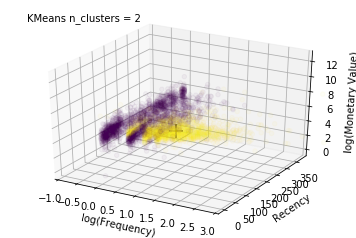

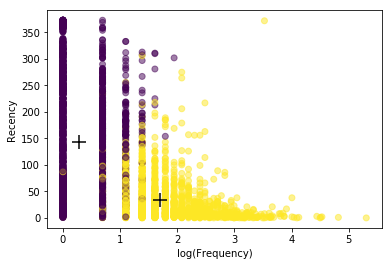

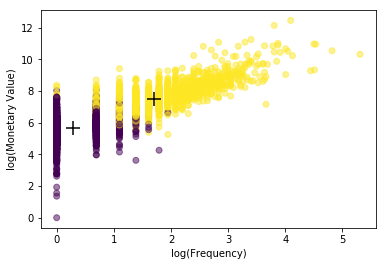

In [56]:
clustering6 = KMeans(n_clusters = 2, init = 'k-means++')
clustering6.fit(anthony_data)
clusters6 = clustering6.labels_
km_centroids = clustering6.cluster_centers_
km_centroids = ss.inverse_transform(km_centroids)

fig = plt.figure()

ax = fig.add_subplot(111,projection = '3d')
ax.text2D(0.05, 0.95, "KMeans n_clusters = 2", transform=ax.transAxes)
p = ax.scatter(anthony_data2[:,0],
               anthony_data2[:, 1],
               anthony_data2[:,2],
              alpha = 0.04,
              c=clusters6)

p2 = ax.scatter(km_centroids[:,0],
                km_centroids[:,1],
                km_centroids[:,2],
                c='k',
                s = 200,
                marker = '+')

ax.set_xlim3d(-1,3)
ax.set_xlabel('log(Frequency)')
ax.set_ylabel('Recency')
ax.set_zlabel('log(Monetary Value)')

plt.figure()

plt.scatter(anthony_data2[:,0],
            anthony_data2[:, 1],
            c = clusters6,
           alpha = 0.5)


plt.scatter(km_centroids[:,0],
           km_centroids[:,1],
           c='k',
           marker='+',
           s=200)

plt.ylabel('Recency')
plt.xlabel('log(Frequency)')

plt.figure()

plt.scatter(anthony_data2[:,0],
            anthony_data2[:, 2],
            c = clusters6,
            alpha = 0.5)

plt.scatter(km_centroids[:,0],
           km_centroids[:,2],
           c='k',
           marker='+',
           s=200)

plt.xlabel('log(Frequency)')
plt.ylabel('log(Monetary Value)')

#### Summarize Ramifications
The first cluster (yellow) is of low frequency buyers that generally spend less than average. The second cluster (purple) consists of high frequency shoppers and those who spend more money than average. Interestingly, the 3-D plot appears to have some overlap in this clusters.

#### Visualize Results

Text(0,0.5,'log(Monetary Value)')

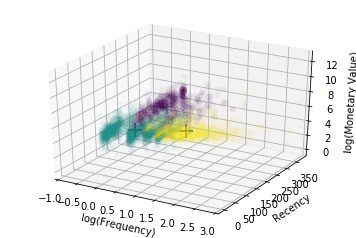

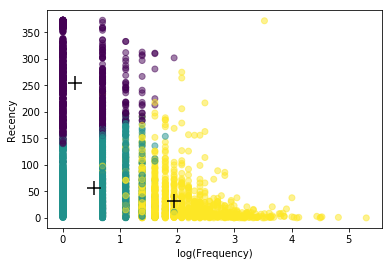

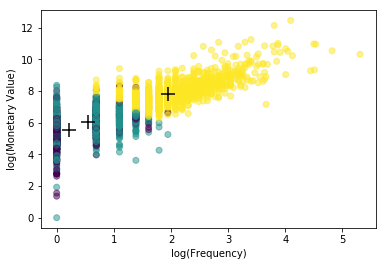

In [57]:
clustering7 = KMeans(n_clusters = 3, init = 'k-means++')
clustering7.fit(anthony_data)
clusters7 = clustering7.labels_
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
p = ax.scatter(anthony_data2[:,0],
               anthony_data2[:, 1],
               anthony_data2[:,2],
              alpha = 0.04,
              c=clusters7)
ax.set_xlim3d(-1,3)
ax.set_xlabel('log(Frequency)')
ax.set_ylabel('Recency')
ax.set_zlabel('log(Monetary Value)')

km2_centroids = clustering7.cluster_centers_
km2_centroids = ss.inverse_transform(km2_centroids)
p2 = ax.scatter(km2_centroids[:,0],
                km2_centroids[:,1],
                km2_centroids[:,2],
                c='k',
                s = 200,
                marker = '+')


plt.figure()
plt.scatter(anthony_data2[:,0],
            anthony_data2[:, 1],
            c = clusters7,
           alpha = 0.5)

plt.scatter(km2_centroids[:,0],
           km2_centroids[:,1],
           c='k',
           marker='+',
           s=200)

plt.ylabel('Recency')
plt.xlabel('log(Frequency)')

plt.figure()
plt.scatter(anthony_data2[:,0],
            anthony_data2[:, 2],
            c = clusters7,
            alpha = 0.5)
plt.scatter(km2_centroids[:,0],
           km2_centroids[:,2],
           c='k',
           marker='+',
           s=200)

plt.xlabel('log(Frequency)')
plt.ylabel('log(Monetary Value)')

#### Summarize Ramificaitons
The first cluster (low frequency buyers that were not big spenders) from the earlier KMeans clustering is essentially split in two. This cluster is for the most part split with respect to recency. One child cluster (green)consists of buyers who have not bought recently (about ~150+ days). The second child cluster consists of mostly buyers who have made a purchase in the past 150 days. These buyers were more likely to spend more money than in the yellow cluster. 

The second cluster (purple) is largely the same as in the previous clustering.


## Deployment
All three types of clustering that we conducted generated 3-4 good clusters that have useful meaning. This is on the lower end of our expected number of clusters, and may indicate that additional information needs to be collected about each customer in order to get a more detailed segmentation for a targeted marketing plan. 

While our clusterings gave similar numbers of clusters, there are algorithms that are better than others for the nature of our data. The K-Means algorithm ended up with a clustering result that resembles others, but because our data clusters are not the same size, this is not the ideal clustering for deployment. Agglomerative clustering resulted in a good seperation for 3 clusters, but when trying to segment any further, the clusters started to overlap. DBSCAN ended up clustering along one variable axis, and segmenting the outliers together, which is not ultimatley useful. 

From a utility perpsective, agglomerative clustering shows the most promise for further investigation. Layering in addtional information about the products ordered may result in a greater number of segments that can be used to specifically market to those segments. This clustering analysis can provide guidance on marketing, which typically plans per year, and adjusts on a quarterly basis, so this analysis should be updated every three months or so. This will also ensure to capture changes in behavior, as well as changes to the product catalog that change with the seasons. 

## Exceptional Work
We conducted analysis building multiple models for each of three different clustering techniques. We also used two evaluation metrics to compare and contrast the best clusterings.